<a href="https://colab.research.google.com/github/DEBORA-PERSICH/ATIVIDADES-COLAB/blob/main/2_0_Atividade_RASTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

import os
os.chdir('spatialindex-src-1.8.5')

!./configure
!make
!make install

!pip install rtree
!ldconfig

In [ ]:
# install necessary packages
!pip install geopandas
!pip install mapclassify
!pip install earthpy
!pip install rioxarray
!pip install os
!pip install numpy
!pip install matplotlib
!pip install seaborn

!pip install shapely.geometry
!pip install pandas
!pip install earthpy
!pip install rasterio
!pip install glob




In [16]:
# Import libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et
import pandas as pd
import rioxarray as rxr
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy.plot as ep
from glob import glob
import earthpy.spatial as es

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Get data and set working directory
et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /root/earth-analytics/data/cold-springs-fire/.


# Challenge 1: **Open And Plot** **Hillshade**

In [17]:
#OPEN DATA
#   RESPOSTA 01
lidar_dtm = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif')
with rio.open(lidar_dtm) as dtmhill_src:
  lidar_dtm_01 = dtmhill_src.read(1, masked = True)



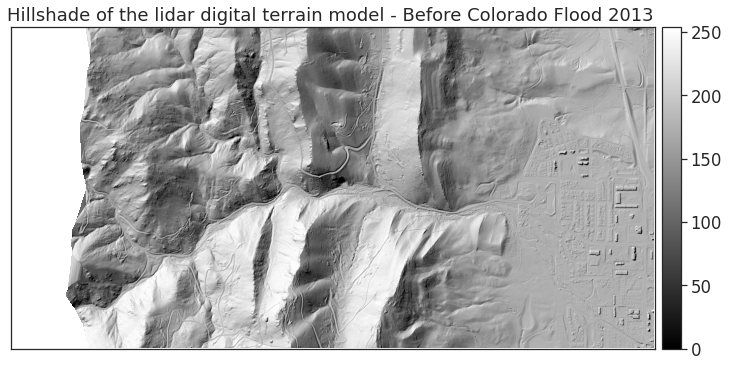

In [158]:
# RESPOSTA 02 e 03
#PLOT01
titles = ["Hillshade of the lidar digital terrain model - Before Colorado Flood 2013 "]

# sphinx_gallery_thumbnail_number = 1
ep.plot_bands(lidar_dtm_01, title=titles,
              cmap="gray")
plt.show()

# **Challenge 2: Overlay DTM Over DTM Hillshade**

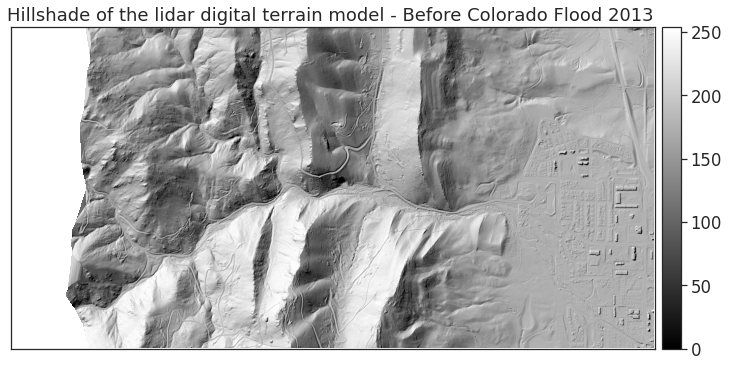

In [19]:
# - RESPOSTA 01 (Plot the hillshade - pre_DTM_hill.tif)
titles = ["Hillshade of the lidar digital terrain model - Before Colorado Flood 2013 "]

# sphinx_gallery_thumbnail_number = 1
ep.plot_bands(lidar_dtm_01, title=titles,
              cmap="gray")
plt.show()


In [159]:
# IMPORT 02 
dtm_pre_path = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
with rio.open(dtm_pre_path) as dtm02_src:
 dtm_pre_arr = dtm02_src.read(1, masked = True)


lidar_dtm = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif')
with rio.open(lidar_dtm) as dtmhill_src:
  lidar_dtm_01 = dtmhill_src.read(1, masked = True)

lidar_dtm_01

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., 170, 164, --],
        [--, --, --, ..., 163, 160, --],
        ...,
        [--, --, --, ..., 187, 186, --],
        [--, --, --, ..., 186, 192, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ..., False, False,  True],
        ...,
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=uint8)

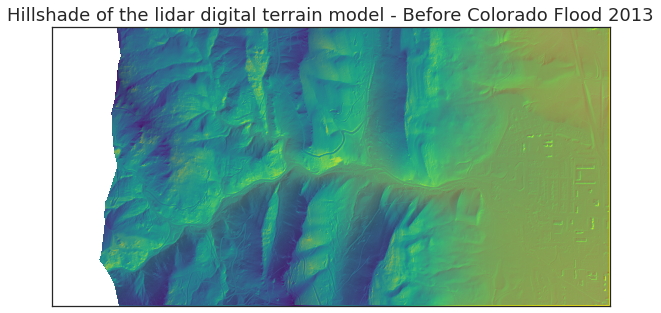

In [160]:
# - RESPOSTA 02 (O DTM que eu abri ↑,  ENCIMA do dtm_pre_arr)
##Plot the hillshade layer pre_DTM_hill.tif that you opened in Challenge 1. Similar to Challenge one set cmap="gray"


fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(dtm_pre_arr, 
              cmap='viridis_r', 
              #alpha= 1, 
              cbar= False,
              ax=ax)
              


ep.plot_bands(lidar_dtm_01, 
              ax=ax, 
              alpha= 0.5,
              cbar= False, 
              cmap='viridis_r',
              title="Hillshade of the lidar digital terrain model - Before Colorado Flood 2013")

#**Challenge 3: Add A Site Boundary to Your Raster Plot**



In [22]:

#IMPORT SHP

site_bound_path =os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# import DTM tif (de novo)
dtm_pre_path = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
with rio.open(dtm_pre_path) as dtm02_src:
 dtm_pre_arr = dtm02_src.read(1, masked = True)
 dtm_pre_arr_extent = plotting_extent(dtm02_src)


#import DTM hill tif (de novo)
lidar_dtm = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif')
with rio.open(lidar_dtm) as dtmhill_src:
  lidar_dtm_01 = dtmhill_src.read(1, masked = True)
  lidar_dtm_extent = plotting_extent(dtmhill_src)  
lidar_dtm_extent  


(472000.0, 476000.0, 4434000.0, 4436000.0)

In [23]:
print(dtm02_src.crs)
print(dtmhill_src.crs)
print(site_bound_shp.crs)


EPSG:32613
EPSG:32613
epsg:32613


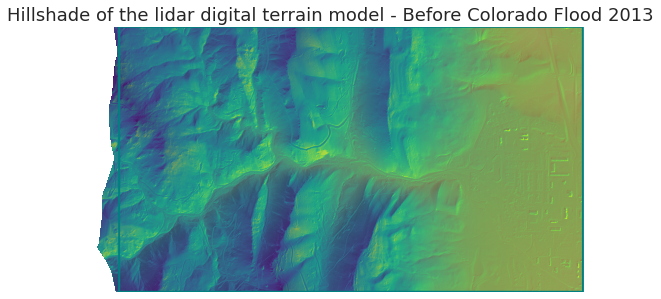

In [161]:

# RESPOSTA.02 - 
fig, ax = plt.subplots(figsize=(10, 6))



ep.plot_bands(dtm_pre_arr, 
              cmap='viridis_r', 
               ax=ax, 
              #alpha= 1,
              cbar=False,
              extent = dtm_pre_arr_extent)

ep.plot_bands(lidar_dtm_01, 
              cmap='viridis_r', 
              alpha= 0.5,
              ax=ax, 
              cbar=False ,
              title="Hillshade of the lidar digital terrain model - Before Colorado Flood 2013",
              extent =lidar_dtm_extent  )

# shapefile - plot
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax)


  
ax.set_axis_off()

plt.show()



# **Challenge 4: Open Post Flood Raster**

In [25]:
#OPEN POST FLOOD DATA post_DTM.tif
post_flood_data = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif')
with rio.open(post_flood_data) as post_src:
  post_flood = post_src.read(1, masked = True)
  post_flood_extent = plotting_extent(post_src) 
post_flood_extent


(472000.0, 476000.0, 4434000.0, 4436000.0)

In [26]:
#OPEN POST FLOOD DATA post_DTM.hill_tif
post_flood_hill_data = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM_Hill.tif')
with rio.open(post_flood_hill_data) as post_hill_src:
  post_hill_flood = post_hill_src.read(1, masked = True)
  post_hill_flood_extent = plotting_extent(post_hill_src) 
post_hill_flood_extent

(472000.0, 476000.0, 4434000.0, 4436000.0)

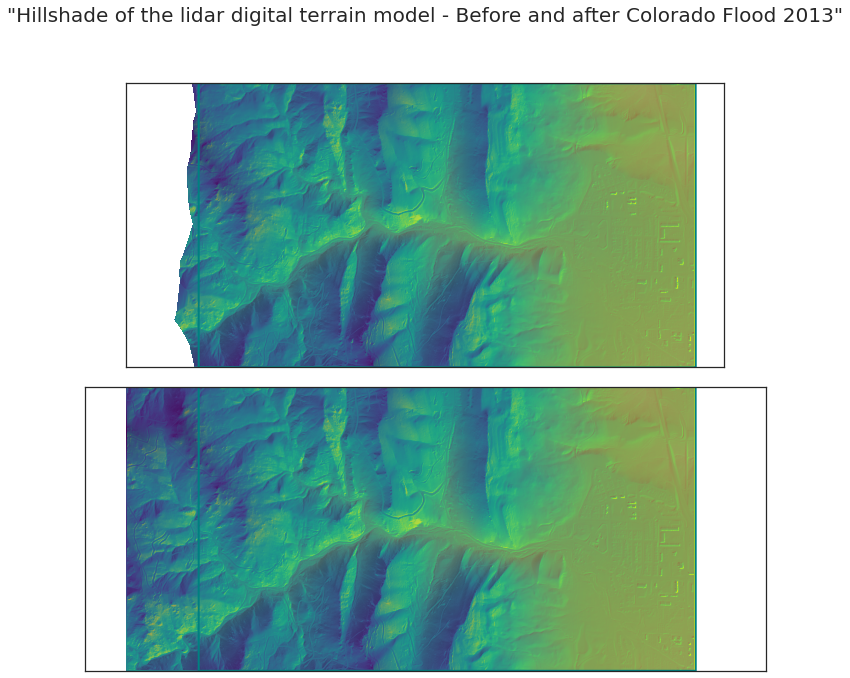

In [27]:
#PLOT - Resposta challenger 04
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ep.plot_bands(dtm_pre_arr, 
              cmap='viridis_r', 
               ax=ax1, 
              #alpha= 1,
              cbar=False,
              extent = dtm_pre_arr_extent)

ep.plot_bands(lidar_dtm_01, 
              cmap='viridis_r', 
              alpha= 0.5,
              ax=ax1, 
              cbar=False ,
              extent =lidar_dtm_extent)
              
          # shapefile - plot
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax1)

ep.plot_bands(post_flood, 
              cmap='viridis_r', 
               ax=ax2, 
              #alpha= 1,
              cbar=False,
              extent = post_flood_extent)

ep.plot_bands(post_hill_flood, 
              cmap='viridis_r', 
              alpha= 0.5,
              ax=ax2, 
              cbar=False ,
              extent =post_hill_flood_extent )
              

          # shapefile - plot
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax2)

plt.suptitle('"Hillshade of the lidar digital terrain model - Before and after Colorado Flood 2013"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])

plt.axis('equal')
plt.show()


# **Challenge 5: plot the GeoTIFF you created**

1.0: O CRS está correto.

In [162]:
#CRIANDO CHM PRE

#IMPORT DTM PRE 
dem_PRE_path = os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif")
dem_pre = rxr.open_rasterio(dem_PRE_path, masked=True).squeeze()


#IMPORT DSM PRE
dsm_PRE_path = os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif")
dsm_pre = rxr.open_rasterio(dsm_PRE_path, masked=True).squeeze()

# Calculate canopy height model 
chm_pre = dsm_pre - dem_pre

# define output path
data_path =  os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab')

# make directory if it does not exist
if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

#new path 
pre_chm_data_path = os.path.join(data_path, 'pre-flood-chm.tif')
pre_chm_data_path

# Export data to geotiff
chm_pre.rio.to_raster(pre_chm_data_path)

The directory /content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab exists!


In [29]:
chm_pre

<xarray.DataArray (y: 2000, x: 4000)>
array([[       nan,        nan,        nan, ..., 0.        , 0.17004395,
        0.960083  ],
       [       nan,        nan,        nan, ..., 0.        , 0.09008789,
        1.6400146 ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [30]:
print('The CRS is:',chm_pre.rio.crs)
print('The resolutions is',chm_pre.rio.resolution)


The CRS is: EPSG:32613
The resolutions is <bound method XRasterBase.resolution of <rioxarray.raster_array.RasterArray object at 0x7fbff9aeb0d0>>


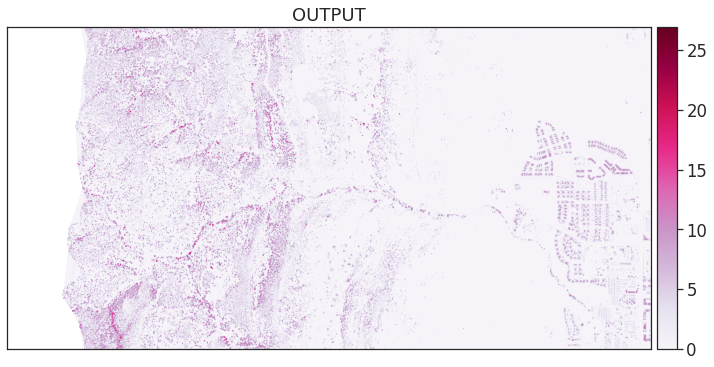

In [163]:
#PLOT

# Plot data 
ep.plot_bands(chm_pre,
              title="OUTPUT",
              cmap="PuRd")

plt.show()

In [32]:
!pip install metpy

     |████████████████████████████████| 361 kB 29.4 MB/s 
     |████████████████████████████████| 204 kB 57.6 MB/s 


# **Challenge 6: Plot Change Over Time**

In [33]:
import xarray as xr
import metpy
from matplotlib.colors import ListedColormap, BoundaryNorm
import earthpy.plot as ep


1º Criação de um CHM com os arquivos de pos flood

In [34]:
# 1.CRIANDO CHM POST

# IMPORT DTM POST 
dem_pos_path2 = os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif")
dem_pos = rxr.open_rasterio(dem_pos_path2, masked=True).squeeze()
# IMPORT DSM POST
dsm_post_path2 = os.path.join("/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif")
dsm_pos = rxr.open_rasterio(dsm_post_path2, masked=True).squeeze()

# Calculate canopy height model 
chm_pos = dsm_pos - dem_pos
chm_pos

#new path pos
pos_chm_data_path = os.path.join(data_path, 'pos-flood-chm.tif')
pos_chm_data_path

# Export data to geotiff
chm_pos.rio.to_raster(pos_chm_data_path)


In [35]:
print(dem_pos.rio.crs)
print(dsm_pos.rio.crs)

EPSG:32613
EPSG:32613


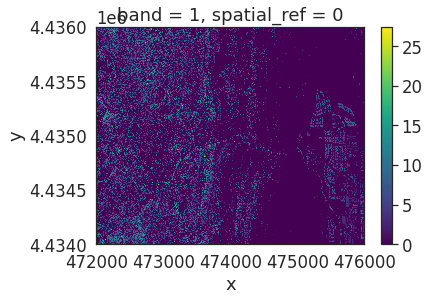

In [36]:
chm_pos.plot()

CRIANDO CHM NEW (CHM POS - CHM PRE)

In [164]:
# CALCULATING NEW CHM (pos-pre)
chm_pre_pos = chm_pos - chm_pre
chm_pre_pos

#new path pos
pre_pos_chm_data_path = os.path.join(data_path, 'pre_pos-flood-chm.tif')
pre_pos_chm_data_path

# Export data to geotiff
chm_pre_pos.rio.to_raster(pre_pos_chm_data_path)



In [38]:
# Make sure that your output data has a crs & no data value defined
print("The crs is", chm_pre_pos.rio.crs)
print("The no data value is", chm_pre_pos.rio.nodata)


The crs is EPSG:32613
The no data value is None


EXPLORANDO OS DADOS CHM_PRE_POS

In [39]:
#open 
chm_pre_pos_path3 =('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab/pre_pos-flood-chm.tif')
chm_pre_pos=rxr.open_rasterio(chm_pre_pos_path3, masked=True).squeeze()
chm_pre_pos


<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [40]:

# Check nodata value for your array
print(chm_pre_pos.rio.nodata)


None


In [41]:
# print min and max values
data_min_value = np.nanmin(chm_pre_pos)
data_max_value = np.nanmax(chm_pre_pos)
print(data_min_value, data_max_value)

-23.429932 24.45996


EXPLORANDO O ARQUIVO CHM CRIADO

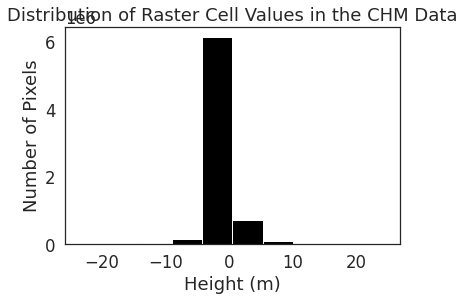

In [42]:
f, ax = plt.subplots()

(count, bin, _) = chm_pre_pos.plot.hist(color = 'black')

ax.set(title="Distribution of Raster Cell Values in the CHM Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

In [43]:
# print count and bin
print(count)
print(bin)

[1.210000e+02 2.417000e+03 2.464300e+04 1.642300e+05 6.129713e+06
 7.074720e+05 1.120190e+05 1.596200e+04 1.116000e+03 3.500000e+01]
[-23.429932   -18.640942   -13.8519535   -9.0629635   -4.2739744
   0.51501465   5.3040037   10.092993    14.881983    19.67097
  24.45996   ]


[Text(0, 0.5, 'Number of Pixels'),
 Text(0.5, 0, 'Height (m)'),
 Text(0.5, 1.0, 'Histogram with Custom Breaks ')]

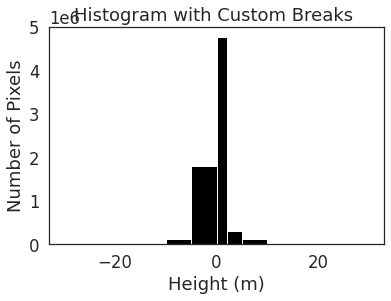

In [44]:
# Histogram with custom breaks
f, ax = plt.subplots()
chm_pre_pos.plot.hist(color="black",
                           bins=[-30, -10, -5, 0, 2, 5, 10, 30])
                          
                       

ax.set(title="Histogram with Custom Breaks ",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

In [45]:
np.iinfo(np.int32).max

2147483647

RECLASSIFICANDO...

In [46]:
# define class_bins 
class_bins = [-np.inf, -10, -5, 0, 2, 5, 10, np.inf]
class_bins

[-inf, -10, -5, 0, 2, 5, 10, inf]

In [47]:
# apply ufunc 
pp_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     chm_pre_pos,
                                     class_bins)
pp_lidar_chm_class

<xarray.DataArray (y: 2000, x: 4000)>
array([[8, 8, 8, ..., 4, 3, 4],
       [8, 8, 8, ..., 4, 3, 3],
       [8, 8, 8, ..., 4, 4, 3],
       ...,
       [8, 8, 8, ..., 4, 4, 4],
       [8, 8, 8, ..., 4, 4, 4],
       [8, 8, 8, ..., 4, 4, 4]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

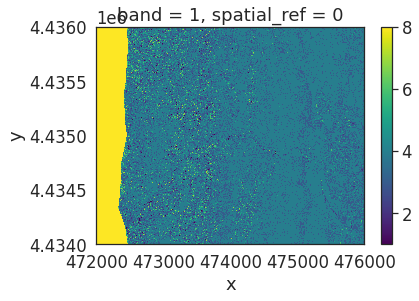

In [48]:
# Values of 5 represent missing data
im = pp_lidar_chm_class.plot.imshow()
ax.set_axis_off()

In [49]:
# Mask out values not equalt to 5
pre_pos_chm_class_ma = pp_lidar_chm_class.where(pp_lidar_chm_class != 5)
pre_pos_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[8., 8., 8., ..., 4., 3., 4.],
       [8., 8., 8., ..., 4., 3., 3.],
       [8., 8., 8., ..., 4., 4., 3.],
       ...,
       [8., 8., 8., ..., 4., 4., 4.],
       [8., 8., 8., ..., 4., 4., 4.],
       [8., 8., 8., ..., 4., 4., 4.]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

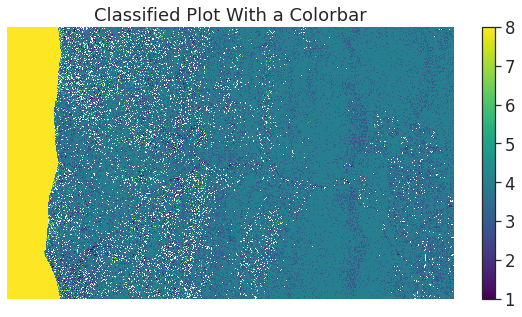

In [50]:
# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10,5))

pre_pos_chm_class_ma.plot.imshow()

ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()
plt.show()

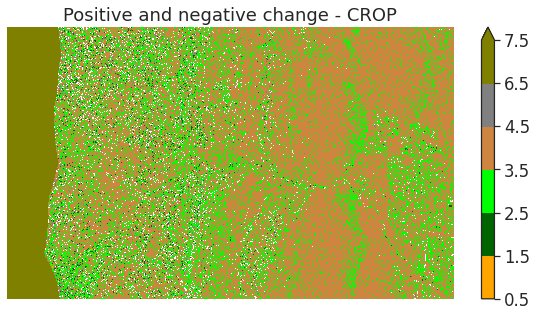

In [165]:
# PPLOT DATA USING NICER COLORS - CHM

colors = ['orange', 'darkgreen','lime', 'peru', 'gray', 'olive']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5, 6.5, 7.5]

cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

pre_pos_chm_class_ma.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Positive and negative change - CROP")
ax.set_axis_off()
plt.show()

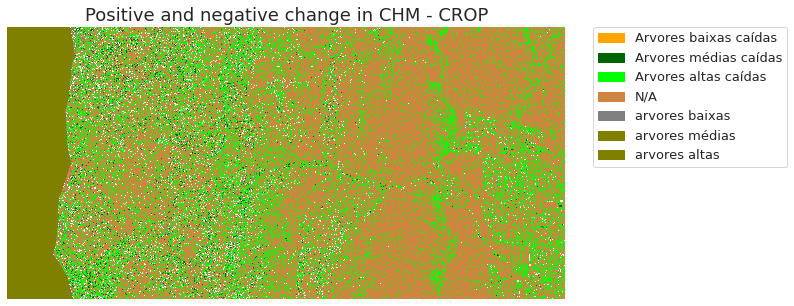

In [157]:
# Create a list of labels to use for your legend
height_classs_labels = ['Arvores baixas caídas',
                        'Arvores médias caídas',
                        'Arvores altas caídas',
                        'N/A',
                        'arvores baixas',
                        'arvores médias',
                        'arvores altas']
                       
                       
                     

# Create a colormap from a list of colors
colors = ['orange', 'darkgreen','lime', 'peru', 'gray', 'olive' ]

# create ListedColormap
cmap = ListedColormap(colors)

# create class_bins
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5, 6.5, 7.5]

# create BoundaryNorm
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

im = pre_pos_chm_class_ma.plot.imshow(cmap = cmap,
                                        norm = norm,
                                        # Turn off colorbar
                                        add_colorbar = False)

# Add legend using earthpy
ep.draw_legend(im,
               titles = height_classs_labels)

ax.set(title="Positive and negative change in CHM - CROP")
ax.set_axis_off()
plt.show()

POSITIVE AND NEGATIVE CHANGE IN TERRAIN

In [53]:
#DEM PRE
dem_pre_path = ('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
dem_pre = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
#DEM POS
dem_pos_path =('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif')
dem_pos = rxr.open_rasterio(dem_pos_path, masked=True).squeeze()


In [54]:
print("The crs is", dem_pre.rio.crs)
print("The no data value is", dem_pre.rio.nodata)

print("The crs is", dem_pos.rio.crs)
print("The no data value is", dem_pos.rio.nodata)


The crs is EPSG:32613
The no data value is nan
The crs is EPSG:32613
The no data value is nan


CRIANDO CHM DO TERRENO

In [166]:
# CALCULATING NEW CHM - TERRAIN
terrain_pre_pos = dem_pos - dem_pre
terrain_pre_pos

# define output path
data_path =  os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab')

# make directory if it does not exist
if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

    # new path
pre_pos_terrain_data_path = os.path.join(data_path, 'terrain_pre_pos-flood-chm.tif')
pre_pos_terrain_data_path

# Export data to geotiff
terrain_pre_pos.rio.to_raster(pre_pos_terrain_data_path)

The directory /content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/output_colab exists!


In [56]:
terrain_pre_pos.rio.crs

CRS.from_epsg(32613)

In [57]:
chm_pre_pos.rio.crs

CRS.from_epsg(32613)

In [58]:
terrain_pre_pos

<xarray.DataArray (y: 2000, x: 4000)>
array([[        nan,         nan,         nan, ..., -0.05004883,
         0.10998535,  0.09997559],
       [        nan,         nan,         nan, ...,  0.05993652,
        -0.01989746,  0.20996094],
       [        nan,         nan,         nan, ...,  0.14001465,
        -0.01000977,  0.11999512],
       ...,
       [        nan,         nan,         nan, ...,  1.420044  ,
         1.4199219 ,  1.5599365 ],
       [        nan,         nan,         nan, ...,  0.67993164,
         0.97998047,  1.0700684 ],
       [        nan,         nan,         nan, ...,  0.29992676,
         0.4699707 ,  0.60998535]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

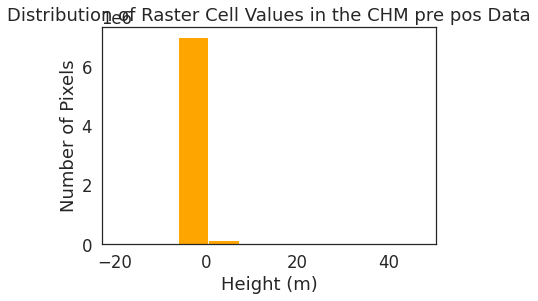

In [59]:
f, ax = plt.subplots()

(count, bin, _) = terrain_pre_pos.plot.hist(color = 'orange')

ax.set(title="Distribution of Raster Cell Values in the CHM pre pos Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

[Text(0, 0.5, 'Number of Pixels'),
 Text(0.5, 0, 'Height (m)'),
 Text(0.5, 1.0, 'Histogram with Custom Breaks')]

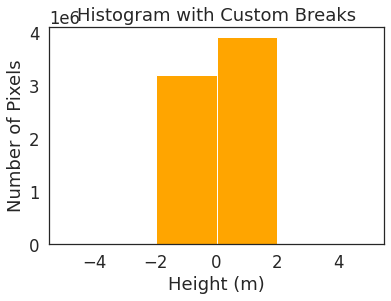

In [60]:
# Histogram with custom breaks
f, ax = plt.subplots()
terrain_pre_pos.plot.hist(color="orange",
                        bins=[ -5, -2, 0, 2, 3, 5])

ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

In [61]:
# print count and bin
print(count)
print(bin)

[1.280000e+02 1.371000e+03 6.983885e+06 1.588830e+05 6.147000e+03
 3.368000e+03 1.798000e+03 9.710000e+02 7.690000e+02 4.080000e+02]
[-19.609985   -12.938977    -6.2679687    0.40303954   7.074048
  13.745056    20.416065    27.087072    33.75808     40.42909
  47.100098  ]


In [62]:
# print min and max values
data_min_value = np.nanmin(terrain_pre_pos)
data_max_value = np.nanmax(terrain_pre_pos)
print(data_min_value, data_max_value)

-19.609985 47.100098


In [63]:
# define class_bins
class_bins2 = [-np.inf, -2, 0, 2, np.inf]
class_bins2

[-inf, -2, 0, 2, inf]

In [64]:
2# apply ufunc
terrain_pre_pos_class = xr.apply_ufunc(np.digitize,
                                     terrain_pre_pos,
                                     class_bins2)
terrain_pre_pos_class

<xarray.DataArray (y: 2000, x: 4000)>
array([[5, 5, 5, ..., 2, 3, 3],
       [5, 5, 5, ..., 3, 2, 3],
       [5, 5, 5, ..., 3, 2, 3],
       ...,
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [65]:
terrain_pre_pos_class.rio.crs

CRS.from_epsg(32613)

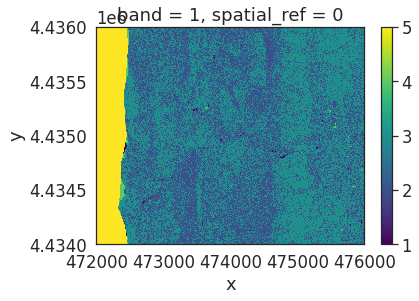

In [66]:
# Values of 5 represent missing data
im = terrain_pre_pos_class.plot.imshow()
ax.set_axis_off()

In [67]:
# Mask out values not equalt to 5
terrain_pre_pos_class_ma = terrain_pre_pos_class.where(terrain_pre_pos_class != 5)
terrain_pre_pos_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  2.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  2.,  3.],
       [nan, nan, nan, ...,  3.,  2.,  3.],
       ...,
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

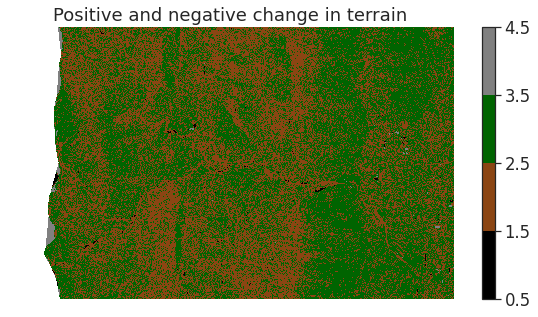

In [68]:
# Plot data using nicer colors
colors = ['black', 'saddlebrown', 'darkgreen', 'grey']
class_bins2 = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins2, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

terrain_pre_pos_class_ma.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Positive and negative change in terrain")
ax.set_axis_off()
plt.show()



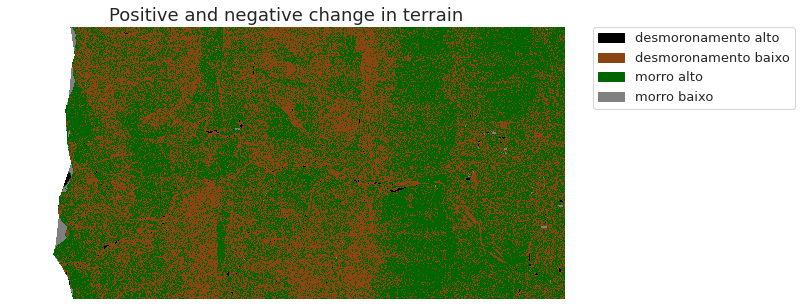

In [70]:
# Create a list of labels to use for your legend
height_classs_labels = ['desmoronamento alto',
                        'desmoronamento baixo',
                        'morro alto',
                        'morro baixo']

# Create a colormap from a list of colors
colors = ['black', 'saddlebrown', 'darkgreen', 'grey']

# create ListedColormap
cmap = ListedColormap(colors)

# create class_bins
class_bins2 = [.5, 1.5, 2.5, 3.5, 4.5]

# create BoundaryNorm
norm = BoundaryNorm(class_bins2, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

im = terrain_pre_pos_class_ma.plot.imshow(cmap = cmap,
                                        norm = norm,
                                        # Turn off colorbar
                                        add_colorbar = False)

# Add legend using earthpy
ep.draw_legend(im,
               titles = height_classs_labels)

ax.set(title="Positive and negative change in terrain")
ax.set_axis_off()
plt.show()

# **Challenge 7: Crop Change Over Time Layers**

In [71]:
from shapely.geometry import mapping

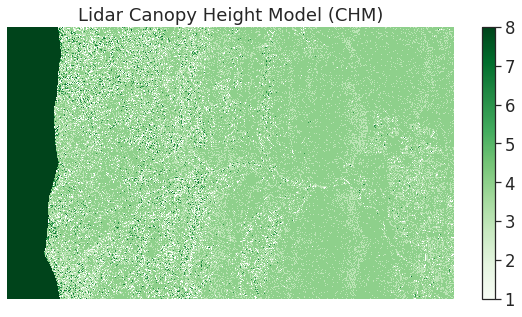

In [72]:

# plot raster
f, ax = plt.subplots(figsize=(10, 5))

pre_pos_chm_class_ma.plot.imshow(cmap="Greens")
ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()

In [73]:
aoi= os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd', 'clip-extent.shp')
# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi)


In [74]:
# print CRSs
print('crop extent crs: ', crop_extent.crs)
print('chm pre pos crs: ', pre_pos_chm_class_ma.rio.crs)

crop extent crs:  epsg:32613
chm pre pos crs:  EPSG:32613


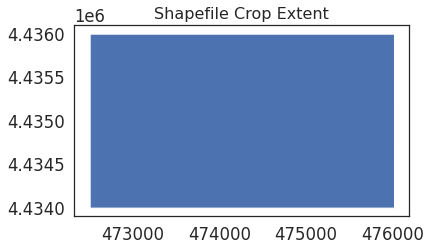

In [75]:
# Plot the crop boundary layer
fig, ax = plt.subplots(figsize=(6, 6))

crop_extent.plot(ax = ax)
                 

ax.set_title("Shapefile Crop Extent",
             fontsize=16)
plt.show()

In [76]:
crop_extent.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

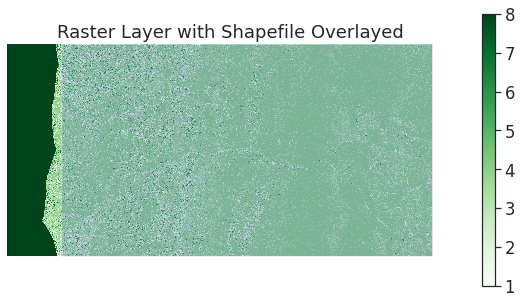

In [77]:
f, ax = plt.subplots(figsize=(10, 5))

# plot raster
pre_pos_chm_class_ma.plot.imshow(cmap="Greens")

# plot shapefile
crop_extent.plot(ax = ax,
                alpha = 0.3)

ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()

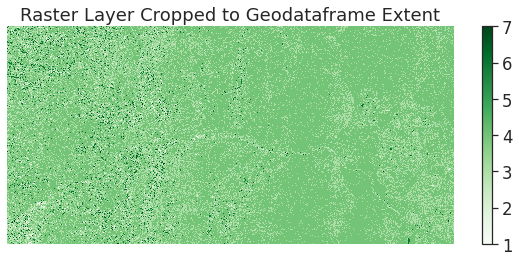

In [78]:
#CLIP CHM
chm_clipped = pre_pos_chm_class_ma.rio.clip(crop_extent.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      crop_extent.crs)

f, ax = plt.subplots(figsize=(10, 4))

chm_clipped.plot(ax=ax,
                 cmap="Greens")
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

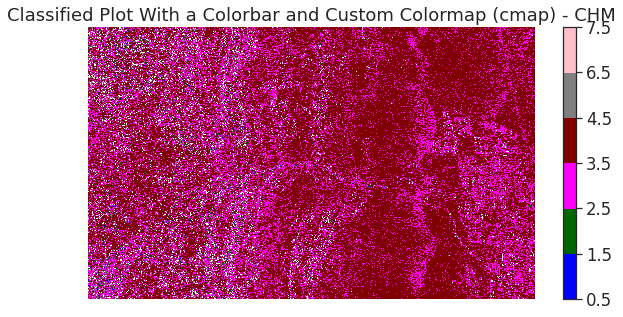

In [79]:
# Plot data using nicer colors
colors = ['blue', 'darkgreen','fuchsia', 'maroon', 'gray', 'pink']

class_bins = [0.5, 1.5, 2.5, 3.5, 4.5, 6.5, 7.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

chm_clipped.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap (cmap) - CHM")
ax.set_axis_off()
plt.show()

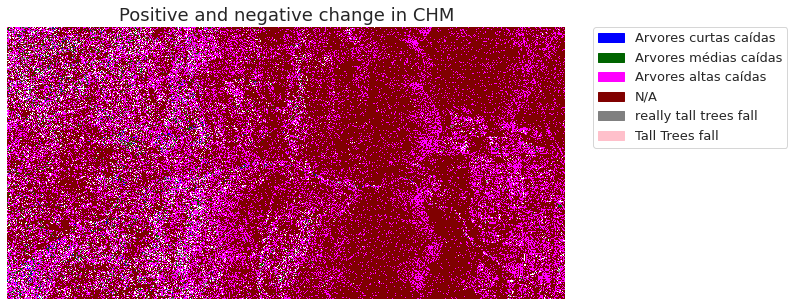

In [80]:
# Create a list of labels to use for your legend
height_classs_labels = ['Arvores curtas caídas',
                        'Arvores médias caídas',
                        'Arvores altas caídas',
                        'N/A',
                        'really tall trees fall',
                        'Tall Trees fall']
                      
                     

# Create a colormap from a list of colors
colors = ['blue', 'darkgreen','fuchsia', 'maroon', 'gray', 'pink']

# create ListedColormap
cmap = ListedColormap(colors)

# create class_bins
class_bins = [ 0.5, 1.5, 2.5, 3.5, 4.5, 6.5, 7.5]

# create BoundaryNorm
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

im = chm_clipped.plot.imshow(cmap = cmap,
                                        norm = norm,
                                        # Turn off colorbar
                                        add_colorbar = False)

# Add legend using earthpy
ep.draw_legend(im,
               titles = height_classs_labels)

ax.set(title="Positive and negative change in CHM")
ax.set_axis_off()
plt.show()

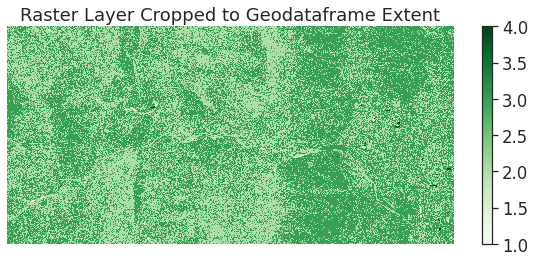

In [81]:
#CLIP TERRAIN
terrain_clipped = terrain_pre_pos_class_ma.rio.clip(crop_extent.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      crop_extent.crs)

f, ax = plt.subplots(figsize=(10, 4))

terrain_clipped.plot(ax=ax,
                 cmap="Greens")
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

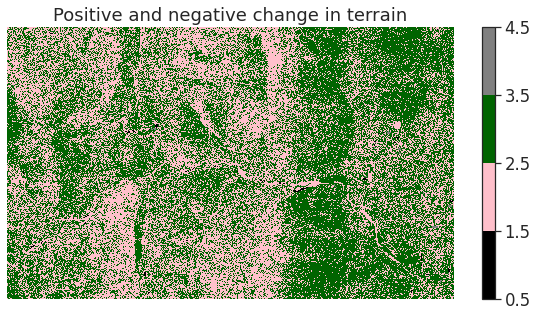

In [167]:

# PPLOT DATA USING NICER COLORS - TERRAIN
colors = ['black', 'pink', 'darkgreen', 'grey']
class_bins2 = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins2, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

terrain_clipped.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Positive and negative change in terrain")
ax.set_axis_off()
plt.show()

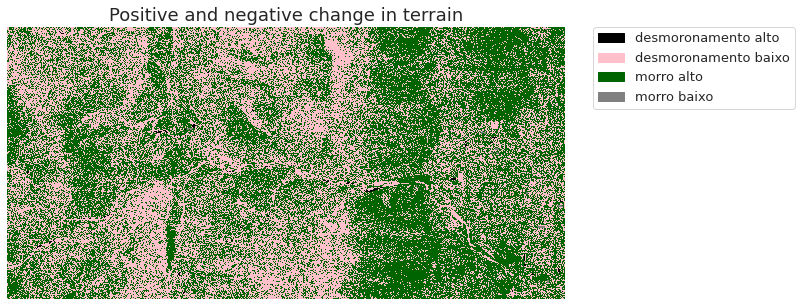

In [83]:
# Create a list of labels to use for your legend - terrain
height_classs_labels = ['desmoronamento alto',
                        'desmoronamento baixo',
                        'morro alto',
                        'morro baixo']

# Create a colormap from a list of colors
colors = ['black', 'pink', 'darkgreen', 'grey']

# create ListedColormap
cmap = ListedColormap(colors)

# create class_bins
class_bins2 = [.5, 1.5, 2.5, 3.5, 4.5]

# create BoundaryNorm
norm = BoundaryNorm(class_bins2, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

im = terrain_clipped.plot.imshow(cmap = cmap,
                                        norm = norm,
                                        # Turn off colorbar
                                        add_colorbar = False)

# Add legend using earthpy
ep.draw_legend(im,
               titles = height_classs_labels)

ax.set(title="Positive and negative change in terrain")
ax.set_axis_off()
plt.show()

#Challenge 8: Reproject a Hillshade Layer¶


In [84]:
from rasterio.crs import CRS

In [85]:
# Open up a hillshade
lidar_dem_path_hill = os.path.join('/content/drive/MyDrive/DOT/AULAS/COLAB/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_hill.tif')

lidar_dem_hill = rxr.open_rasterio(lidar_dem_path_hill,
                                   masked=True).squeeze()
# CHeck the CRS
lidar_dem_hill.rio.crs

CRS.from_epsg(32613)

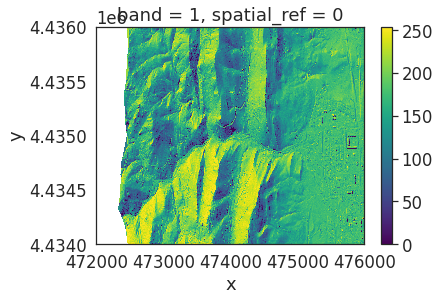

In [85]:
lidar_dem_hill.plot()

In [86]:
# CHeck the CRS
chm_clipped.rio.crs

CRS.from_epsg(32613)

In [87]:
terrain_clipped.rio.crs

CRS.from_epsg(32613)

In [88]:
lidar_dem_hill.rio.crs


CRS.from_epsg(32613)

Como observado acima, NÃO HÁ distinção entre os CRS dos arquivos (não houve reprojeção ao longo do código)

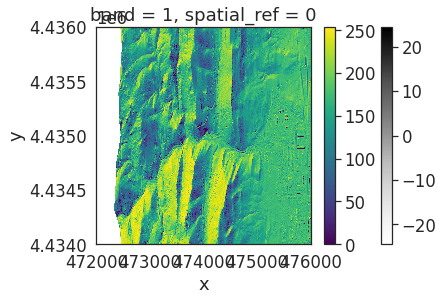

In [140]:
# When you try to overlay the building footprints the data don't line up
f, ax = plt.subplots()

chm_pre_pos.plot.imshow(ax = ax,
                      cmap = 'Greys')

lidar_dem_hill.plot(ax = ax)

plt.show()

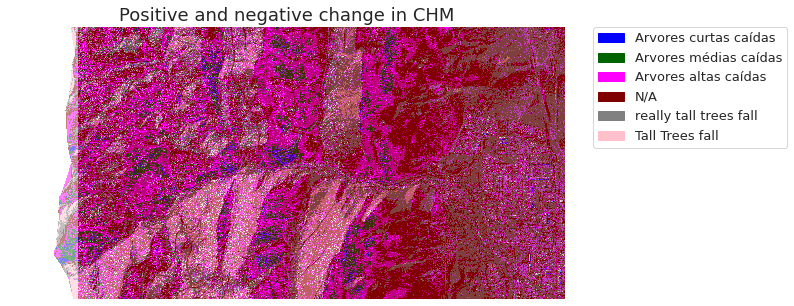

In [155]:
# Create a list of labels to use for your legend
height_classs_labels = ['Arvores curtas caídas',
                        'Arvores médias caídas',
                        'Arvores altas caídas',
                        'N/A',
                        'really tall trees fall',
                        'Tall Trees fall']
                      
                     

# Create a colormap from a list of colors
colors = ['blue', 'darkgreen','fuchsia', 'maroon', 'gray', 'pink']

# create ListedColormap
cmap = ListedColormap(colors)

# create class_bins
class_bins = [ 0.5, 1.5, 2.5, 3.5, 4.5, 6.5, 7.5]

# create BoundaryNorm
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))



im = chm_clipped.plot.imshow(cmap = cmap,
                                        norm = norm,
                                        # Turn off colorbar
                                        add_colorbar = False)
lidar_dem_hill.plot.imshow(ax=ax,
                           cmap=cmap,
                           add_colorbar=False,
                           alpha= 0.5)

# Add legend using earthpy
ep.draw_legend(im,
               titles = height_classs_labels)

ax.set(title="Positive and negative change in CHM")
ax.set_axis_off()
plt.show()

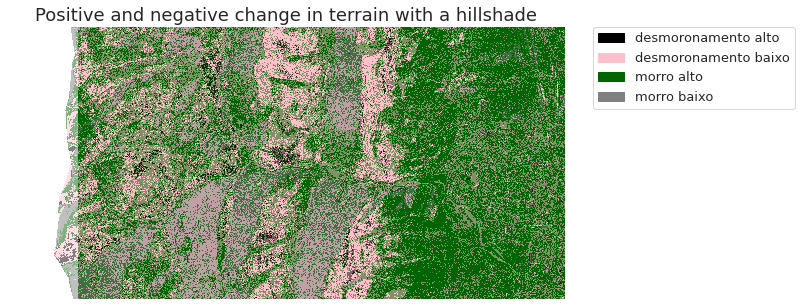

In [152]:
# Create a list of labels to use for your legend - terrain
height_classs_labels = ['desmoronamento alto',
                        'desmoronamento baixo',
                        'morro alto',
                        'morro baixo']

# Create a colormap from a list of colors
colors = ['black', 'pink', 'darkgreen', 'grey']

# create ListedColormap
cmap = ListedColormap(colors)

# create class_bins
class_bins2 = [.5, 1.5, 2.5, 3.5, 4.5]

# create BoundaryNorm
norm = BoundaryNorm(class_bins2, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))

im = terrain_clipped.plot.imshow(ax=ax,
                                 cmap = cmap,
                                        norm = norm,
                                        # Turn off colorbar
                                        add_colorbar = False)
lidar_dem_hill.plot.imshow(ax=ax,
                           cmap=cmap,
                           add_colorbar=False,
                           alpha= 0.5)
                           

# Add legend using earthpy
ep.draw_legend(im,
               titles = height_classs_labels)

ax.set(title="Positive and negative change in terrain with a hillshade")
ax.set_axis_off()
plt.show()